# Rede neural com uma camadas escondida - Exercício manual

<img src='../figures/rede_neural_exercicio_manual.png', width=600></img>

## Importando as bibliotecas

In [1]:
%matplotlib inline
from sklearn import datasets
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable
import torch.nn as nn

## Leitura, normalização e visualização dos dados

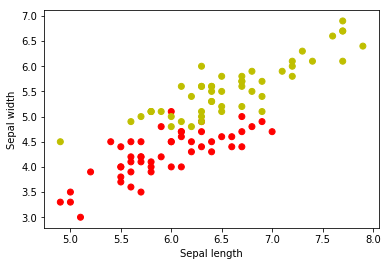

In [2]:
n_samples = 150
iris = datasets.load_iris()
Y = iris.target - 1
X = iris.data[Y>=0,:3]  # comprimento das sépalas e pétalas, indices 0, 1 e 2
Y = Y[Y>=0]
colors = np.array(['r','y','b'])
plt.scatter(X[:, 0], X[:, 2], c=colors[Y])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### Prepara os dados para o PyTorch

In [3]:
X_tensor = torch.FloatTensor(X)
Y_tensor = torch.LongTensor(Y)

## Construindo o modelo da rede

In [4]:
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.linear1 = nn.Linear(3, 4)
        self.linear2 = nn.Linear(4, 2)
    
    def forward(self, x):
        x = self.linear1(x)
        x = nn.functional.relu(x)
        x = self.linear2(x)
        return x
    
model = Modelo()
print(model)

Modelo(
  (linear1): Linear(in_features=3, out_features=4)
  (linear2): Linear(in_features=4, out_features=2)
)


## Fazendo um predict para testar

In [5]:
X[:1,:]

array([[ 7. ,  3.2,  4.7]])

In [6]:
z = model(Variable(X_tensor[:2,:]))
z

Variable containing:
 0.0762 -0.1893
 0.0508 -0.1509
[torch.FloatTensor of size 2x2]

## Treinamento

In [7]:
lr = 0.015

optimizer = torch.optim.SGD(model.parameters(), lr=lr)

criterion = nn.CrossEntropyLoss()

### Laço principal de treinamento

In [8]:
nb_epoch = 3000

losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(Variable(X_tensor))

    loss = criterion(output, Variable(Y_tensor))

    # zero, backpropagation gradient, atualiza param gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.data[0])
    
print('Final loss:', loss.data[0])

Final loss: 0.20778928697109222


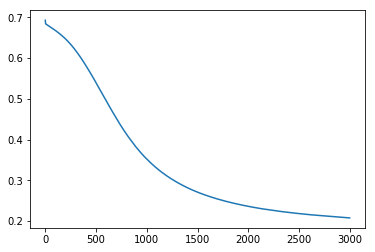

In [9]:
plt.plot(losses)

## Avaliação

### Imprimindo pesos finais

In [10]:
for name, w in model.state_dict().items():
    print('{:16}{}'.format(name, w.size()))
    if len(w.size()) > 1:
        print(w.t())
    else:
        print(w)

linear1.weight  torch.Size([4, 3])

-0.5624 -0.1258 -0.5067  1.2007
-0.1642 -0.5241 -0.2889  0.9339
-0.4344  0.3650  0.5233 -2.1460
[torch.FloatTensor of size 3x4]

linear1.bias    torch.Size([4])

 0.2131
-0.5403
 0.5649
 0.9371
[torch.FloatTensor of size 4]

linear2.weight  torch.Size([2, 4])

-0.1160  0.4535
 0.1438  0.0463
-0.1774 -0.3870
 1.8973 -2.0030
[torch.FloatTensor of size 4x2]

linear2.bias    torch.Size([2])

-1.3189
 1.2225
[torch.FloatTensor of size 2]



### Avaliação do classificador

In [11]:
def predict(model, inputs):
    outputs = model(Variable(inputs))
    _, predicts = torch.max(outputs, 1)
    
    return predicts.data.numpy()

In [12]:
Y_hat = predict(model, X_tensor)
accuracy = (Y_hat == Y).mean()
print() 
print('Training Accuracy: ', accuracy)


Training Accuracy:  0.93


### Matriz de confusão

In [13]:
import pandas as pd
pd.crosstab(Y_hat, Y)

col_0,0,1
row_0,,
0,46,3
1,4,47


## Atividades

### Experimentos:

1. Simule na mão, com o auxílio da figura, o cálculo do score z para algumas amostras

In [14]:
xin = X_tensor[:1,:]
print(xin)
z = model(Variable(xin))
print(z)


 7.0000  3.2000  4.7000
[torch.FloatTensor of size 1x3]

Variable containing:
 2.9393 -3.2728
[torch.FloatTensor of size 1x2]



## Principais aprendizados